### Image Processing: Median Filtering 
One image processing technique to minimize noise is called median filtering. Eventually, this technique would be used on spectrograms but more specifically this notebook will look at differences from Mel spectrograms as this was the input data in this journal: 

https://core.ac.uk/reader/30341728 (shorter paper) and https://peerj.com/articles/488/ (longer paper) by Dr. Stowell

In [2]:
import pydub
from pydub import AudioSegment
import matplotlib.pyplot as plt
import numpy as np
import librosa
from librosa import feature, display
import skimage
from skimage import io
from scipy import ndimage, misc
# Needed to show matplotlib inside Jupyter notebook
%matplotlib inline

Load Data and Create Mel Spectrogram

In [3]:
def read_mp3(f, normalized=True):
    """
    Inputs: MP3 to numpy array, f = filename
    Output: a.frame_rate (sampling rate)
    """
    a = pydub.AudioSegment.from_file(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return np.float32(y) / 2**15, a.frame_rate
    else:
        return y, a.frame_rate
    
def plot_mel_spectrogram(data, rate): 
    mel_spect = librosa.feature.melspectrogram(y=data, sr=rate, n_fft=1024, hop_length=512)
    
    mel_spect_log = np.log(mel_spect + 1e-9) # add small number to avoid log(0)
#     print("mel_spect_log",mel_spect_log)
    librosa.display.specshow(mel_spect_log, y_axis='mel', x_axis='time')
    
    ## Or could use these two lines ##
#     mel_spect_dB = librosa.power_to_db(mel_spect, ref=np.max)
#     librosa.display.specshow(mel_spect_dB, y_axis='mel', x_axis='time');

    plt.gray() # show the filtered result in grayscale
    plt.axis('off')
    plt.savefig('mel_spect.png', bbox_inches='tight', dpi=300, frameon='false', pad_inches=0.0)
    
    return mel_spect_log

# Saving a librosa spectrogram plot: https://stackoverflow.com/questions/56719138/how-can-i-save-a-librosa-spectrogram-plot-as-a-specific-sized-image
    

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


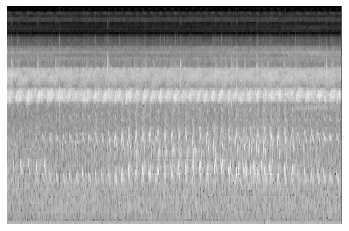

In [4]:
dirpath = '/Volumes/Elements/Madre_de_Dios_Xeno_Canto_Birdcalls/XC22019 - Blue-crowned Trogon - Trogon curucui.mp3'
x, fs = read_mp3(dirpath)
output = plot_mel_spectrogram(x, fs)


## Median filtering 

### OpenCV 

(906, 1395)


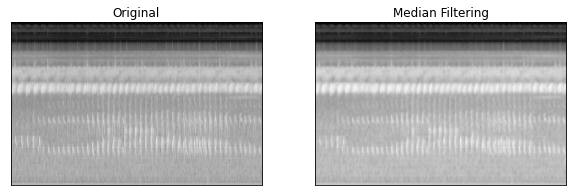

In [34]:
import cv2

dir_image = '/Users/yoo-jin/git/passive-acoustic-biodiversity-main/Image_Transformation_Techniques/mel_spect.png'
img_original = cv2.imread(dir_image)

img = cv2.imread(dir_image, 0) # Load image
print(img.shape)

# Note that the kernel size can only be odd
img_median = cv2.medianBlur(img, 9) # Add median filter to image

plt.figure(figsize=(10,3))

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_median)
plt.title('Median Filtering')
plt.xticks([]), plt.yticks([])

plt.show()

### Scipy's median filter
https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.median_filter.html

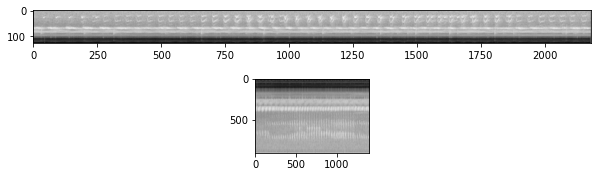

In [35]:
from scipy import ndimage
import imageio
from scipy import signal

original = imageio.imread(dir_image)
result = ndimage.median_filter(output, 3)

fig = plt.figure(figsize=(10,3))

ax1 = fig.add_subplot(2, 1, 1)  # left side
ax2 = fig.add_subplot(2, 1, 2)  # right side
ax1.imshow(result)
ax2.imshow(original)
plt.show()

### Scipy's medfilt 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html

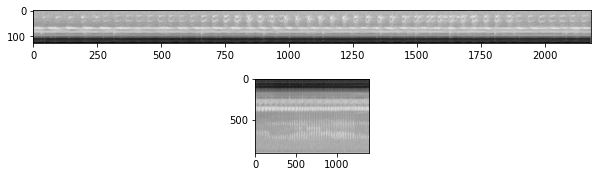

In [36]:
from scipy import ndimage
import imageio
from scipy import signal

original = imageio.imread(dir_image)
result_2 = signal.medfilt(output, 3) # runs slower than median_filter above

fig = plt.figure(figsize=(10,3))

ax1 = fig.add_subplot(2, 1, 1)  # left side
ax2 = fig.add_subplot(2, 1, 2)  # right side
ax1.imshow(result_2)
ax2.imshow(original)
plt.show()

### PIL Median Filter
https://www.geeksforgeeks.org/python-pil-medianfilter-and-modefilter-method/ 

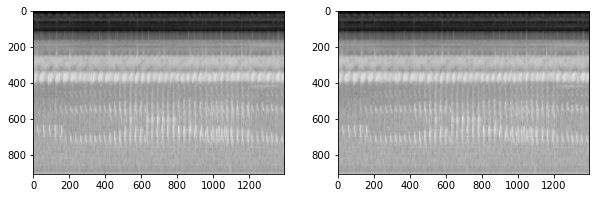

In [37]:
# Importing Image and ImageFilter module from PIL package   
from PIL import Image, ImageFilter  

im1 = Image.open(dir_image)
im2 = im1.filter(ImageFilter.MedianFilter(size = 3))

fig = plt.figure(figsize=(10,3))

ax1 = fig.add_subplot(1, 2, 1)  # left side
ax2 = fig.add_subplot(1, 2, 2)  # right side
ax1.imshow(im1)
ax2.imshow(im2)
plt.show()